# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Siwi Yulinda Amelia Putri
- **Email:** siwiyulinda5@students.unnes.ac.id
- **ID Dicoding:** siwiyulinda

## Menentukan Pertanyaan Bisnis

- Apa efek dari pergantian musim terhadap tingkat penyewaan sepeda?
- Bagaimana kondisi cuaca berdampak pada jumlah orang yang menyewa sepeda?
- Adakah perbedaan signifikan antara jumlah penyewaan oleh pelanggan biasa dan pelanggan yang sudah terdaftar?


## Mengimport semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**1. Tabel Data Hari (Day)**

In [2]:
days_df = pd.read_csv("https://raw.githubusercontent.com/siwiyulindaa/proyek-analisis-data/refs/heads/main/DataSet/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**2. Tabel Data Jam (Hour)**

In [3]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/siwiyulindaa/proyek-analisis-data/refs/heads/main/DataSet/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**1. Memeriksa Type Data day_df dan hour_df**

In [4]:
days_df.info()
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Pengamatan pada day_df menunjukkan adanya ketidaksesuaian tipe data di kolom dteday. Seharusnya kolom ini bertipe datetime, bukan OBJECT.

**2. Memeriksa Missing Value**

In [6]:
print('Dataframe day:')
print(days_df.isna().sum())

print('\nDataframe hour:')
print(hours_df.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Analisis terhadap missing value pada data mengindikasikan bahwa tidak terdapat nilai yang hilang atau kosong

**3. Memeriksa Duplikasi Data**

In [7]:
print('Dataframe day:', days_df.duplicated().sum())
print("Dataframe hour:", hours_df.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


Hasil analisis duplikasi data memperlihatkan tidak ada data yang mengalami duplikasi

**4. Memeriksa Parameter Statistik**

In [8]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


###Descriptive Analysis

**Dataset Hari (Day)**

- Jumlah data(count): 731 rekaman data.
- Musim: Rata-rata berada di sekitar musim panas (season 2).
- Tahun: Paling sering muncul di tahun 2012 (yr = 1).
- Bulan: Rata-rata bulan adalah sekitar 6.52 berarti berada di bulan Juli (mnth 7).
- Hari Libur: Rata-rata menunjukkan sekitar 2.87% hari adalah hari libur.
- Hari dalam Seminggu: Rata-rata hari adalah sekitar 2.997, mendekati pertengahan minggu.
- Hari Kerja: Rata-rata menunjukkan sekitar 68.40% hari adalah hari kerja.
- Situasi Cuaca: Rata-rata cuaca adalah sekitar 1.395, menunjukkan mayoritas cuaca adalah cerah hingga berawan.
- Suhu: Rata-rata suhu adalah sekitar 0.495.
- Suhu Terasa: Rata-rata suhu terasa adalah sekitar 0.474.
- Kelembapan: Rata-rata kelembapan adalah sekitar 0.628.
- Kecepatan Angin: Rata-rata kecepatan angin adalah sekitar 0.19.
- Pengguna Kasual: Rata-rata pengguna kasual adalah sekitar 848.
- Pengguna Terdaftar: Rata-rata pengguna terdaftar adalah sekitar 3656.
- Jumlah Total Penyewaan: Rata-rata jumlah penyewaan sepeda adalah sekitar 4504 /hari.

**Dataset Jam (Hour)**

- Jumlah data(count): 17379 rekaman data.
- Musim: Rata-rata berada di sekitar musim panas (season 2).
- Tahun: Paling sering muncul di tahun 2012 (yr = 1).
- Bulan: Rata-rata bulan adalah sekitar 6.54 berarti berada di bulan Juli (mnth 7).
- Jam: Rata-rata jam adalah sekitar 11.55, menunjukkan bahwa data terkumpul sepanjang hari.
- Hari Libur: Rata-rata menunjukkan sekitar 2.88% hari adalah hari libur.
- Hari dalam Seminggu: Rata-rata hari adalah sekitar 3.00, mendekati pertengahan minggu.
- Hari Kerja: Rata-rata menunjukkan sekitar 68.3% jam adalah pada hari kerja.
- Situasi Cuaca: Rata-rata cuaca adalah sekitar 1.43, menunjukkan mayoritas cuaca adalah cerah hingga berawan.
- Suhu: Rata-rata suhu adalah sekitar 0.497 (setelah dikonversi menjadi sekitar 20.37°C).
- Suhu Terasa: Rata-rata suhu terasa adalah sekitar 0.476 (setelah dikonversi menjadi sekitar 23.79°C).
- Kelembapan: Rata-rata kelembapan adalah sekitar 0.627 (setelah dikonversi menjadi sekitar 62.72%).
- Kecepatan Angin: Rata-rata kecepatan angin adalah sekitar 0.19.
- Pengguna Kasual: Rata-rata pengguna kasual adalah sekitar 35.68.
- Pengguna Terdaftar: Rata-rata pengguna terdaftar adalah sekitar 153.79.
- Jumlah Total Penyewaan: Rata-rata jumlah penyewaan sepeda adalah sekitar 189.46.

### Cleaning Data

**1. Mengubah Tipe Data Kolom 'dteday'**

In [20]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

#Hasil perbaikan tipe data kolom dteday
print('days_df["dteday"] : ', days_df["dteday"].dtypes)
print('hours_df["dteday"] : ', hours_df["dteday"].dtypes)

days_df["dteday"] :  datetime64[ns]
hours_df["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore Data Hour

In [22]:
# Melihat rangkuman parameter statistik dari data hours_df
hours_df.describe(include = "all")

,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.00000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,835.43543,1189.437755,6272.288394,12.736540,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,33.62000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,571.54000,833.250000,4800.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,840.50000,1212.000000,6300.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,1109.46000,1553.000000,7800.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1681.00000,2500.000000,10000.000000,56.996900,367.000000,886.000000,977.000000,NaN


**1. Penyewaan sepeda berdasarkan cuaca**

In [23]:
weather_grouped = hours_df.groupby('weather_situation').agg({
    "count":["sum"]
}).reset_index()

weather_grouped.columns = ['weather_situation', 'count_sum']

print(weather_grouped.sort_values(by='count_sum', ascending=False))

  weather_situation  count_sum
0             Clear    2338173
1              Mist     795952
2   Light Snow/Rain     158331
3   Heavy Rain/Snow        223


<ipython-input-23-415518c9f668>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_grouped = hours_df.groupby('weather_situation').agg({


**2. Penyewaan sepeda berdasarkan jam**

In [24]:
# Melihat distribusi penyewaan berdasarkan jam yang paling sering disewa(dataset hour_df)

hourly_counts = hours_df.groupby('hours')['count'].sum().reset_index()
hourly_counts.columns = ['hours', 'count_sum']

hourly_counts = hourly_counts.sort_values(by='count_sum', ascending=False)

print(hourly_counts.to_string(index=False))

 hours  count_sum
    17     336860
    18     309772
     8     261001
    16     227748
    19     226789
    13     184919
    12     184414
    15     183149
    14     175652
    20     164550
     9     159438
     7     154171
    11     151320
    10     126257
    21     125445
    22      95612
    23      63941
     6      55132
     0      39130
     1      24164
     2      16352
     5      14261
     3       8174
     4       4428


## Visualization & Explanatory Analysis

- Pertanyaan 1: Apa efek dari pergantian musim terhadap tingkat penyewaan sepeda?
- Pertanyaa 2: Bagaimana kondisi cuaca berdampak pada jumlah orang yang menyewa sepeda?
- Pertanyaan 3: Adakah perbedaan signifikan antara jumlah penyewaan oleh pelanggan biasa dan pelanggan yang sudah terdaftar?

### Pertanyaan 1: Apa efek dari pergantian musim terhadap tingkat penyewaan sepeda?

<ipython-input-26-353e4f246043>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = days_df.groupby('season')['count'].mean().reset_index()
<ipython-input-26-353e4f246043>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='season', y='count', palette=colors)


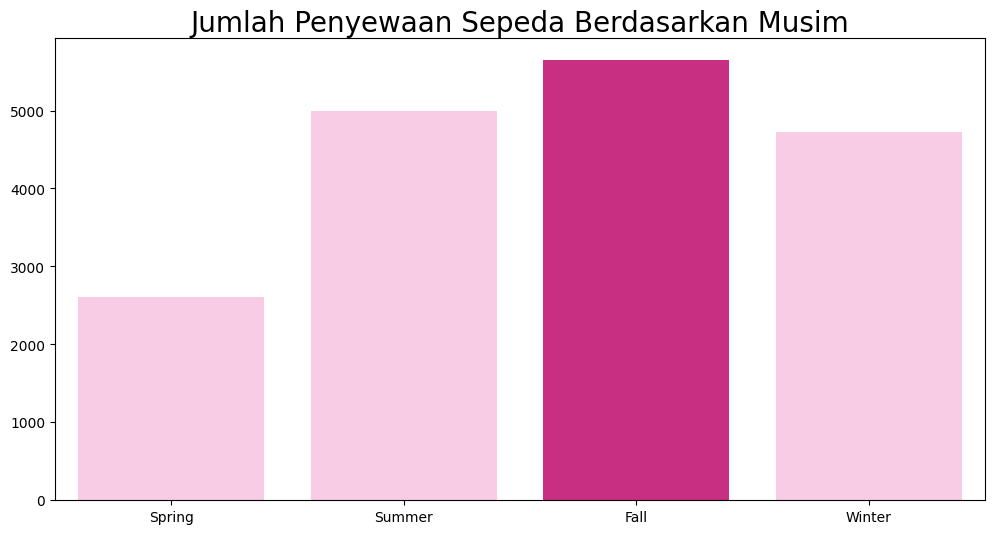

In [26]:
colors= [ "#FEC5E5", "#FEC5E5", "#E11584", "#FEC5E5"]

# Mengelompokka data berdasarkan musim dan menghitung rata-rata jumlah penyewaan sepeda
season_counts = days_df.groupby('season')['count'].mean().reset_index()

# Visualisasi pengaruh musim terhadap jumlah penyewaan sepeda
plt.figure(figsize=(12,6))
sns.barplot(data=season_counts, x='season', y='count', palette=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=20, pad=5)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Visualisasi data memperlihatkan bahwa **Musim Gugur (Fall)** dan **Musim Panas (Summer)** memimpin dalam jumlah rata-rata penyewaan sepeda. Ini menunjukkan adanya korelasi antara perubahan musim dan tingkat penyewaan, di mana musim-musim yang lebih hangat cenderung menghasilkan penyewaan yang lebih tinggi dibandingkan musim-musim yang lebih dingin. Pola ini menegaskan bahwa cuaca yang lebih nyaman untuk aktivitas luar ruangan berpengaruh positif terhadap keputusan masyarakat dalam menyewa sepeda.

### Pertanyaan 2: Bagaimana kondisi cuaca berdampak pada jumlah orang yang menyewa sepeda?

<ipython-input-27-8ceb49b9b172>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = hours_df.groupby('weather_situation')['count'].mean().reset_index()
<ipython-input-27-8ceb49b9b172>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_counts, x='weather_situation', y='count', palette=colors)


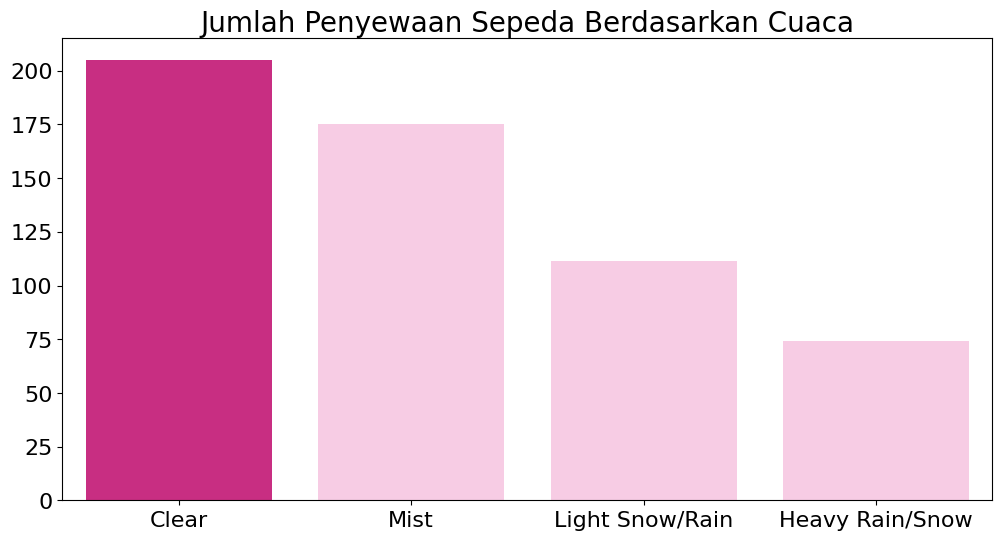

In [27]:
colors= [ "#E11584", "#FEC5E5", "#FEC5E5", "#FEC5E5"]

# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata jumlah penyewaan sepeda
weather_counts = hours_df.groupby('weather_situation')['count'].mean().reset_index()

# Visualisasi pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda (Hour)
plt.figure(figsize=(12,6))
sns.barplot(data=weather_counts, x='weather_situation', y='count', palette=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca', fontsize=20, pad=5)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

Berdasarkan visualisasi data yang telah dibuat, terlihat bahwa jumlah penyewaan sepeda lebih tinggi saat **Cuaca Clear** dibandingkan dengan kondisi cuaca lainnya. Hal ini menunjukkan bahwa cuaca memengaruhi jumlah penyewaan sepeda.

### Pertanyaan 3: Adakah perbedaan signifikan antara jumlah penyewaan oleh pelanggan biasa dan pelanggan yang sudah terdaftar?

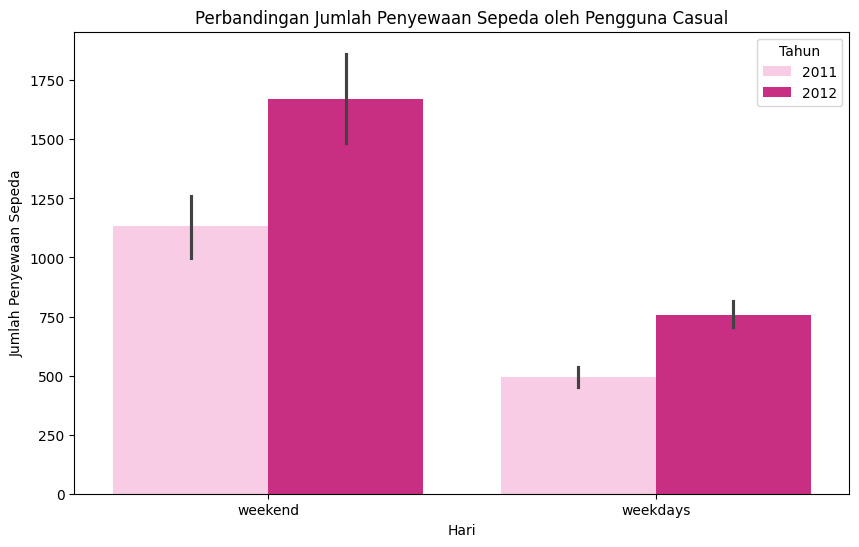

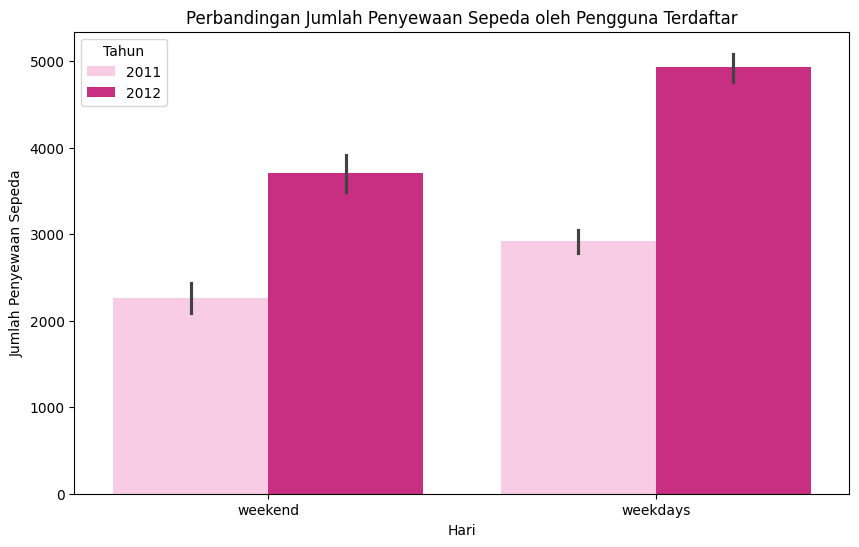

In [28]:
colors = ["#FEC5E5", "#E11584"]
# Membuat boxplot untuk pengguna casual
plt.figure(figsize=(10, 6))
sns.barplot(data=days_df, x='category_days', y='casual', hue='year', palette=colors)
plt.title('Perbandingan Jumlah Penyewaan Sepeda oleh Pengguna Casual')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tahun')
plt.show()

# Membuat boxplot untuk pengguna terdaftar
plt.figure(figsize=(10, 6))
sns.barplot(data=days_df, x='category_days', y='registered', hue='year', palette=colors)
plt.title('Perbandingan Jumlah Penyewaan Sepeda oleh Pengguna Terdaftar')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Tahun')
plt.show()

Dari visualisasi di atas, terlihat bahwa pengguna kasual cenderung menyewa sepeda pada akhir pekan atau hari libur, sedangkan pengguna terdaftar lebih sering menyewa sepeda pada hari kerja.

## Conclusion

- Pertanyaan 1: Dari visualisasi yang dihasilkan, dapat disimpulkan bahwa rata-rata penyewaan sepeda lebih tinggi pada **Musim Gugur (Fall)** dan **Musim Panas (Summer)** dibandingkan musim lainnya. Perbandingan rata-rata penyewaan per musim menunjukkan bahwa perubahan musim memengaruhi jumlah penyewaan, dengan musim yang lebih hangat cenderung memiliki lebih banyak penyewaan dibanding musim dingin.

- Pertanyaan 2: Berdasarkan visualisasi data yang dibuat, terlihat bahwa jumlah penyewaan sepeda lebih tinggi saat cuaca **clear** dibandingkan dengan kondisi cuaca lainnya, yang menunjukkan bahwa cuaca memengaruhi jumlah penyewaan sepeda.

- Pertanyaan 3: Pengguna terdaftar (registered) cenderung menyewa sepeda pada hari kerja, sementara pengguna kasual lebih memilih menyewa sepeda pada hari libur.